### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Data Preprocessing

### Loading the Dataframe

In [4]:
df = pd.read_csv('/Users/adityamanjunatha/Library/CloudStorage/OneDrive-IndianInstituteofScience/IISc Semester/5th Semester/Data Analytics/Assignments/Assignment 4/04_cricket_1999to2011.csv')

df = df[df['Innings'] == 1]
df.reset_index(drop=True, inplace=True)

col = [col for col in df.columns if col not in ['Match', 'Date', 'Innings', 'Over', 'Runs', 'Total.Runs', 'Innings.Total', 'Runs.Remaining', 'Total.Out', 'Innings.Total.Out', 'Outs.Remaining', 'Wickets.in.Hand', 'Innings.Total.Runs', 'Total.Overs']]
df.drop(col, axis=1, inplace=True)
df.head()


,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Total.Overs
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,50
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,50
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,50
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,50
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,50


In [5]:
df['Overs.Remaining'] = 50 - df['Over']
#df.drop('Total.Overs', axis=1, inplace=True)

### Need to create 10 df's. Where each df holds info about matches where a wicket has been lost.

Matches where 10 wickets left in hand at different overs

In [6]:
df_10 = df[df['Wickets.in.Hand'] == 10].reset_index(drop=True)
df_9 = df[df['Wickets.in.Hand'] == 9].reset_index(drop=True)
df_8 = df[df['Wickets.in.Hand'] == 8].reset_index(drop=True)
df_7 = df[df['Wickets.in.Hand'] == 7].reset_index(drop=True)
df_6 = df[df['Wickets.in.Hand'] == 6].reset_index(drop=True)
df_5 = df[df['Wickets.in.Hand'] == 5].reset_index(drop=True)
df_4 = df[df['Wickets.in.Hand'] == 4].reset_index(drop=True)
df_3 = df[df['Wickets.in.Hand'] == 3].reset_index(drop=True)
df_2 = df[df['Wickets.in.Hand'] == 2].reset_index(drop=True)
df_1 = df[df['Wickets.in.Hand'] == 1].reset_index(drop=True)
df_0 = df[df['Wickets.in.Hand'] == 0].reset_index(drop=True)

# So df_i contains all the overs where i wickets are in hand
#df_10.head()
df_0.head()


,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Total.Overs,Overs.Remaining
0,65193,14/05/1999,1,45,11,204,204,0,10,10,0,0,50,5
1,65198,17/05/1999,1,38,4,116,116,0,10,10,0,0,50,12
2,65199,18/05/1999,1,50,1,203,203,0,10,10,0,0,50,0
3,65212,26/05/1999,1,45,2,152,152,0,10,10,0,0,50,5
4,65215,27/05/1999,1,32,1,68,68,0,10,10,0,0,50,18


In [7]:
col = ['Match', 'Date', 'Innings.Total.Runs','Runs.Remaining', 'Overs.Remaining' ,'Total.Overs'] # Columns to be used for the model
df_10 = df_10[col]
df_9 = df_9[col]
df_8 = df_8[col]
df_7 = df_7[col]
df_6 = df_6[col]
df_5 = df_5[col]
df_4 = df_4[col]
df_3 = df_3[col]
df_2 = df_2[col]
df_1 = df_1[col]
df_0 = df_0[col]

#df_10.head()

Grouping the rows by overs remaining

In [8]:

df_10 = df_10.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_10['Wickets.in.Hand'] = 10
df_9 = df_9.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_9['Wickets.in.Hand'] = 9
df_8 = df_8.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_8['Wickets.in.Hand'] = 8
df_7 = df_7.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_7['Wickets.in.Hand'] = 7
df_6 = df_6.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_6['Wickets.in.Hand'] = 6
df_5 = df_5.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_5['Wickets.in.Hand'] = 5
df_4 = df_4.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_4['Wickets.in.Hand'] = 4
df_3 = df_3.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_3['Wickets.in.Hand'] = 3
df_2 = df_2.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_2['Wickets.in.Hand'] = 2
df_1 = df_1.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_1['Wickets.in.Hand'] = 1
df_0 = df_0.sort_values(by=['Overs.Remaining'], ascending=False).reset_index(drop=True)
df_0['Wickets.in.Hand'] = 0


In [9]:
df_10.head()

,Match,Date,Innings.Total.Runs,Runs.Remaining,Overs.Remaining,Total.Overs,Wickets.in.Hand
0,226383,17/01/2006,282,280,49,50,10
1,226392,6/01/2006,224,220,49,50,10
2,226393,8/01/2006,273,267,49,50,10
3,226380,22/01/2006,309,304,49,50,10
4,226379,13/01/2006,318,312,49,50,10


### Now for every data frame we need to add rows where Overs.Remaining is 50, And Runs Remaning is made to be Innings.Total.Runs for every  row which has 49 Overs Remaining

In [10]:
# Assuming df_10 is your DataFrame
df_10_copy = df_10.copy()

# Filter rows where Overs.Remaining = 49
rows_with_49_overs = df_10[df_10['Overs.Remaining'] == 49]

# Create new rows with required modifications
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 10
new_rows['Total.Overs'] = 50

# Append the new rows to the original DataFrame
df_10_with_new_rows = pd.concat([df_10_copy, new_rows], ignore_index=True)

# Sorting the DataFrame wrt match and remaining overs
df_10_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)

# Reset index if necessary
df_10_with_new_rows.reset_index(drop=True, inplace=True)

df_10 = df_10_with_new_rows

df_9_copy = df_9.copy()
rows_with_49_overs = df_9[df_9['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 9
new_rows['Total.Overs'] = 50
df_9_with_new_rows = pd.concat([df_9_copy, new_rows], ignore_index=True)
df_9_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_9_with_new_rows.reset_index(drop=True, inplace=True)
df_9 = df_9_with_new_rows

df_8_copy = df_8.copy()
rows_with_49_overs = df_8[df_8['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 8
new_rows['Total.Overs'] = 50
df_8_with_new_rows = pd.concat([df_8_copy, new_rows], ignore_index=True)
df_8_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_8_with_new_rows.reset_index(drop=True, inplace=True)
df_8 = df_8_with_new_rows

df_7_copy = df_7.copy()
rows_with_49_overs = df_7[df_7['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 7
new_rows['Total.Overs'] = 50
df_7_with_new_rows = pd.concat([df_7_copy, new_rows], ignore_index=True)
df_7_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_7_with_new_rows.reset_index(drop=True, inplace=True)
df_7 = df_7_with_new_rows

df_6_copy = df_6.copy()
rows_with_49_overs = df_6[df_6['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 6
new_rows['Total.Overs'] = 50
df_6_with_new_rows = pd.concat([df_6_copy, new_rows], ignore_index=True)
df_6_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_6_with_new_rows.reset_index(drop=True, inplace=True)
df_6 = df_6_with_new_rows

df_5_copy = df_5.copy()
rows_with_49_overs = df_5[df_5['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 5
new_rows['Total.Overs'] = 50
df_5_with_new_rows = pd.concat([df_5_copy, new_rows], ignore_index=True)
df_5_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_5_with_new_rows.reset_index(drop=True, inplace=True)
df_5 = df_5_with_new_rows

df_4_copy = df_4.copy()
rows_with_49_overs = df_4[df_4['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 4
new_rows['Total.Overs'] = 50
df_4_with_new_rows = pd.concat([df_4_copy, new_rows], ignore_index=True)
df_4_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_4_with_new_rows.reset_index(drop=True, inplace=True)
df_4 = df_4_with_new_rows

df_3_copy = df_3.copy()
rows_with_49_overs = df_3[df_3['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 3
new_rows['Total.Overs'] = 50
df_3_with_new_rows = pd.concat([df_3_copy, new_rows], ignore_index=True)
df_3_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_3_with_new_rows.reset_index(drop=True, inplace=True)
df_3 = df_3_with_new_rows

df_2_copy = df_2.copy()
rows_with_49_overs = df_2[df_2['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 2
new_rows['Total.Overs'] = 50
df_2_with_new_rows = pd.concat([df_2_copy, new_rows], ignore_index=True)
df_2_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_2_with_new_rows.reset_index(drop=True, inplace=True)
df_2 = df_2_with_new_rows

df_1_copy = df_1.copy()
rows_with_49_overs = df_1[df_1['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 1
new_rows['Total.Overs'] = 50
df_1_with_new_rows = pd.concat([df_1_copy, new_rows], ignore_index=True)
df_1_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_1_with_new_rows.reset_index(drop=True, inplace=True)
df_1 = df_1_with_new_rows

df_0_copy = df_0.copy()
rows_with_49_overs = df_0[df_0['Overs.Remaining'] == 49]
new_rows = rows_with_49_overs.copy()
new_rows['Overs.Remaining'] = 50
new_rows['Runs.Remaining'] = new_rows['Innings.Total.Runs']
new_rows['Wickets.in.Hand'] = 0
new_rows['Total.Overs'] = 50
df_0_with_new_rows = pd.concat([df_0_copy, new_rows], ignore_index=True)
df_0_with_new_rows.sort_values(by=['Match', 'Overs.Remaining'], ascending = False,inplace=True)
df_0_with_new_rows.reset_index(drop=True, inplace=True)
df_0 = df_0_with_new_rows



## Score function :- If a df does not have overs left = 1, test for 2, 3, ... and then give L_0
## Complete the code :- Completed

In [11]:
def Z_0(w): # Intial guesses for Z_0
    # Average number of runs scored with w wickets in hand and no over restrictions
    #z0 = [0, 27.5, 2*27.5, 3*27.5, 4*27.5, 5*27.5, 6*27.5, 7*27.5, 8*27.5, 9*27.5, 10*27.5]  # Initial guess from slides
    #z0 = [0, 15, 30, 3*27.5, 4*27.5, 5*27.5, 6*27.5, 7*27.5, 8*27.5, 9*27.5, 10*27.5]# Good tweaking but w5,6 are too high
    z0 = [0, 15, 30, 3*27.5, 4*27.5, 100, 140, 7*27.5, 8*27.5, 9*27.5, 10*27.5] # Reduced 5,6 . This is best
    x = z0[w]
    return x 

def L_0(w, df): # Finding Initial guess for L
    # Look at all those rows which have only 1 over remaining. Then take their Runs Remaining
    assert df['Wickets.in.Hand'][0] == w, "W not matching with df"
    df_L = df.copy()
    if len(df_L[df_L['Overs.Remaining'] == 1]) != 0:
        df_L = df_L[df_L['Overs.Remaining'] == 1]
        df_L.reset_index(drop=True, inplace = True)
        print(f"Over used is 1")
    else:
        df_L = df_L[df_L['Overs.Remaining'] != 0]
        df_L.reset_index(drop=True, inplace = True)
        df_L.sort_values(by=['Overs.Remaining'], ascending = True, inplace = True)
        df_L.reset_index(drop=True, inplace = True)
        # The following line is done to tackle the case where a dataframe does not have Overs.Remaining == 1, then length would have been 0
        # So here we take Overs.Remaining as the least one available in the dataframe
        #print(len(df_L))
        #print(df_L['Overs.Remaining'][0])
        df_L = df_L[df_L['Overs.Remaining'] == df_L['Overs.Remaining'].iloc[0]]
        df_L.reset_index(drop=True, inplace = True)
        print(f"Over used is {df_L['Overs.Remaining'].iloc[0]}")
    length = len(df_L)
    #print(f"length : {length}")
    avg_runs = df_L['Runs.Remaining'].mean()
    return (avg_runs/6)/df_L['Overs.Remaining'][0] # Should we also divide or multiply by the over we used, was it 1 or 2 or... ie df_L['Overs.Remaining'][0]

def L_arr(w): # Initial Guess Array
    #L = [L_0(1, df_1), L_0(2, df_2), L_0(3, df_3), L_0(4, df_4), L_0(5, df_5), L_0(6, df_6), L_0(7, df_7), L_0(8, df_8), L_0(9, df_9), L_0(10, df_10)]
    #L = [0, 1.0603070175438596, 1.346938775510204, 1.6776798825256976, 1.714814814814815, 2, 2, 2, 2.25, 4.833333333333333, 8.166666666666666]
    #L = [0, 5, 7, 3, 4, 5, 6, 7, 8, 9, 10] # Good but w5,6 are too low with slopes
    L = [0, 5, 7, 3, 4, 9, 9, 7, 8, 9, 10] # Best parameters
    return L[w]

def Z(u, w, z_0, L_0):
    if z_0 !=0 and u  !=0 :
        z = z_0 * (1 - math.exp(-L_0 * u/z_0))
        return z
    if u == 0 or z_0 == 0:
        return 0

In [12]:
df_10.head()

,Match,Date,Innings.Total.Runs,Runs.Remaining,Overs.Remaining,Total.Overs,Wickets.in.Hand
0,538070,3/12/2011,262,262,50,50,10
1,538070,3/12/2011,262,256,49,50,10
2,538070,3/12/2011,262,251,48,50,10
3,536932,8/12/2011,418,418,50,50,10
4,536932,8/12/2011,418,416,49,50,10


In [13]:
x = L_0(10, df_10)
print(x)

Over used is 6
1.361111111111111


### To get an initial guess for L(w), look at the change in score ie Z(0.1, w) - Z(0, w) 
### ie Runs remaining when 1 left left with w wickets - 0 . But dont have data for only 1 ball, so we will take Z(1, w) and divide by 6

## Loss function

In [14]:
def loss(z, y):
    loss = (z+1)*math.log((z+1)/(y+1)) - z + y
    return loss

For each 'w', find the value of z_0(w) and L(w) that minimizes the loss

## Total Loss

In [15]:
#w = 10
# Need initial guess for z_0 and L
# From there we must find the optimal z and L which minimizes the loss function loss(z, y)

def total_loss(df, w, z_0, L_0):
    total_loss = 0
    #z_0 = Z_0(w)
    #L_0 = L_0(w, df)
    #print(f"DataFrame length: {len(df)}")
    for i in range(len(df)):
        u = df['Overs.Remaining'][i]
        z_ = Z(u, w, z_0, L_0)
        y = df['Runs.Remaining'][i]
        total_loss = total_loss + loss(z_,y)
    return total_loss/len(df)

#total_loss = total_loss(df_10, 50, 10, L_arr(10))
#print(total_loss)
#L_0_10 = L_0(10, df_10)
#print(L_0_10)

def total_loss_wrapper(params, df, w):
    z_0, l_0 = params
    return total_loss(df, w, z_0, l_0)

### Given L_0(w) and Z_0(w), find the Z and L for each w, which minimizes total_loss(df, u, w, L)

In [16]:

# Finding best parameters when 10 wickets in hand
w = 10
z_0 = Z_0(w)
l_0 = L_arr(w)
initial_guess = [z_0, l_0]

result = minimize(total_loss_wrapper, initial_guess, args=(df_10, w), method='BFGS')

z_opt, L_opt = result.x

print(f"Optimized z: {z_opt}")
print(f"Optimized L: {L_opt}")

Optimized z: 272.87499783739594
Optimized L: 10.68205954319748


/var/folders/bb/9cn_ww913cx91bvsnv8452l00000gn/T/ipykernel_52990/548413884.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  loss = (z+1)*math.log((z+1)/(y+1)) - z + y
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


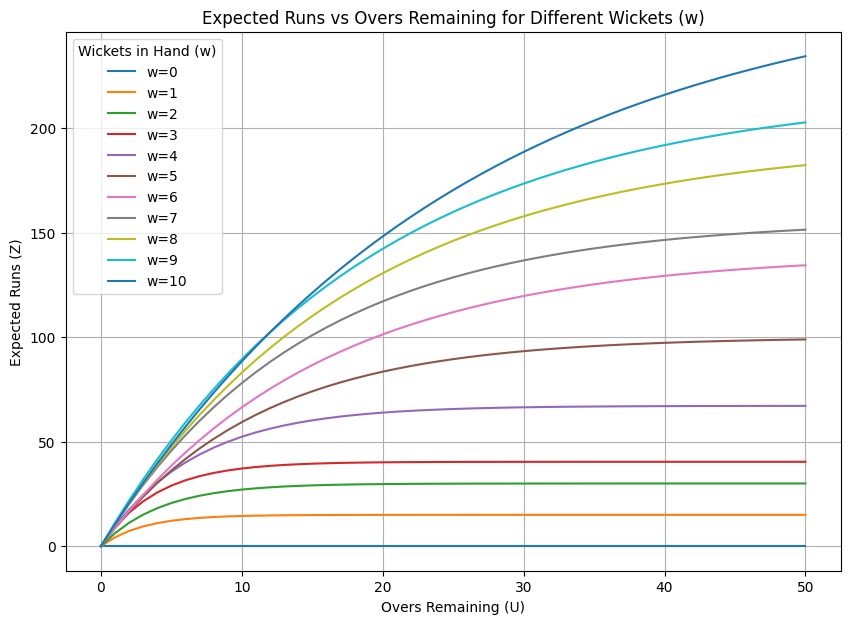

The optimized L_0 array for problem 1 is [np.float64(0.0), np.float64(5.0), np.float64(7.0), np.float64(10.209592421952651), np.float64(10.155230812883714), np.float64(9.0), np.float64(9.0), np.float64(10.807489124235698), np.float64(10.830516136477272), np.float64(11.50258598291583), np.float64(10.68205954319748)]
The optimized z_0 array for problem 1 is [np.float64(0.0), np.float64(15.0), np.float64(30.0), np.float64(40.38108791663969), np.float64(67.15335203578316), np.float64(100.0), np.float64(140.0), np.float64(156.31024478495783), np.float64(194.21532939711238), np.float64(218.36197932727143), np.float64(272.87499783739594)]


In [17]:
dfs = {0:df_0, 1: df_1, 2: df_2, 3: df_3, 4: df_4, 5: df_5, 6: df_6, 7: df_7, 8: df_8, 9: df_9, 10: df_10}

# Initialize plot
plt.figure(figsize=(10, 7))
z_opt_arr_1 = []
L_opt_arr = []
# Loop over all values of w from 1 to 10 and plot them on the same graph
for w in range(0, 11):
    df = dfs[w]  # Get corresponding dataframe for each w
    
    # Initial guess and optimization
    z_0 = Z_0(w)
    l_0 = L_arr(w)
    initial_guess = [z_0, l_0]
    
    result = minimize(total_loss_wrapper, initial_guess, args=(df, w), method='BFGS')
    z_opt, L_opt = result.x
    L_opt_arr.append(L_opt)
    z_opt_arr_1.append(z_opt)
    # Calculate Z for U = [1, 2, ..., 50]
    U = list(range(0, 51))
    Z_values = []
    #Z_values.append(0)
    for u in U:
        Z_values.append(Z(u, w, z_opt, L_opt))
    
    
    # Plot Z vs U for this w
    plt.plot(U, Z_values, label=f'w={w}')

# Configure the overall plot
plt.title('Expected Runs vs Overs Remaining for Different Wickets (w)')
plt.xlabel('Overs Remaining (U)')
plt.ylabel('Expected Runs (Z)')
plt.grid(True)
plt.legend(title="Wickets in Hand (w)")
plt.show()
print(f"The optimized L_0 array for problem 1 is {L_opt_arr}")
print(f"The optimized z_0 array for problem 1 is {z_opt_arr_1}")


### Now take l_opt as average of all l_opt and then find the 10 z_opt

/var/folders/bb/9cn_ww913cx91bvsnv8452l00000gn/T/ipykernel_52990/2565577065.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z = z_0 * (1 - math.exp(-L_0 * u/z_0))
/var/folders/bb/9cn_ww913cx91bvsnv8452l00000gn/T/ipykernel_52990/548413884.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss = (z+1)*math.log((z+1)/(y+1)) - z + y
/var/folders/bb/9cn_ww913cx91bvsnv8452l00000gn/T/ipykernel_52990/548413884.py:2: RuntimeWarning: divide by zero encountered in divide
  loss = (z+1)*math.log((z+1)/(y+1)) - z + y
/var/folders/bb/9cn_ww913cx91bvsnv8452l00000gn/T/ipykernel_52990/548413884.py:2: RuntimeWarning: divide by zero encountered in sc

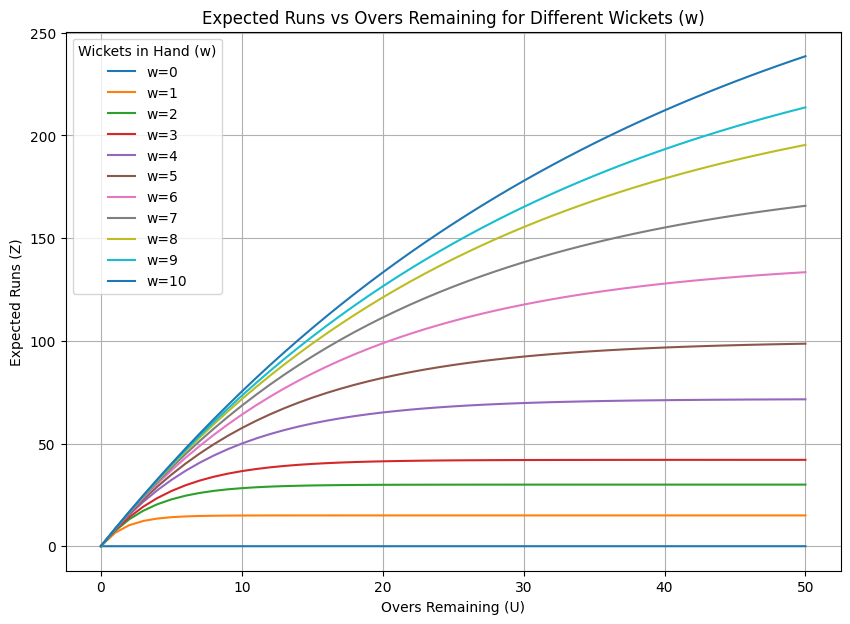

The optimized z_0 array for problem 2 is [np.float64(0.0030838144209895755), np.float64(15.0), np.float64(30.0), np.float64(42.060278321594744), np.float64(71.71186340555674), np.float64(100.0), np.float64(140.0), np.float64(183.57093634608384), np.float64(232.1187590345248), np.float64(267.8279789639006), np.float64(326.69350944648073)]
The optimized l_0 value for problem 2 is 8.56249763833297


In [18]:
L = np.array(L_opt_arr)
L_avg = np.mean(L_opt_arr)
dfs = {0:df_0, 1: df_1, 2: df_2, 3: df_3, 4: df_4, 5: df_5, 6: df_6, 7: df_7, 8: df_8, 9: df_9, 10: df_10}

def total_loss_wrapper_1(params, df, w, l_0):
    z_0 = params
    return total_loss(df, w, z_0, l_0)

# Initialize plot
plt.figure(figsize=(10, 7))
z_opt_arr = []
# Loop over all values of w from 1 to 10 and plot them on the same graph
for w in range(0, 11):
    df = dfs[w]  # Get corresponding dataframe for each w
    
    # Initial guess and optimization
    z_0 = Z_0(w)
    l_0 = L_avg
    initial_guess = [z_0]
    
    result = minimize(total_loss_wrapper_1, initial_guess, args=(df, w, l_0), method='BFGS')
    z_opt = result.x[0]
    z_opt_arr.append(z_opt)
    # Calculate Z for U = [1, 2, ..., 50]
    U = list(range(0, 51))
    Z_values = []
    #Z_values.append(0)
    for u in U:
        Z_values.append(Z(u, w, z_opt, L_avg))
    
    # Plot Z vs U for this w
    plt.plot(U, Z_values, label=f'w={w}')

# Configure the overall plot
plt.title('Expected Runs vs Overs Remaining for Different Wickets (w)')
plt.xlabel('Overs Remaining (U)')
plt.ylabel('Expected Runs (Z)')
plt.grid(True)
plt.legend(title="Wickets in Hand (w)")
plt.show()
print(f"The optimized z_0 array for problem 2 is {z_opt_arr}")
print(f"The optimized l_0 value for problem 2 is {L_avg}")
